Le data set est dans : https://www.kaggle.com/datasets/kmader/finding-lungs-in-ct-data/

A exemple of a segmentation images with CE-Net

![exemple](image_1.png)

In [2]:
import os
import numpy as np
import pandas as pd
import math 
import cv2


In [ ]:
import tensorflow as tf

In [3]:
images_path = './archive/2d_images'
mask_path = './archive/2d_masks'
test = './archive/2d_masks/ID_0000_Z_0142.tif'

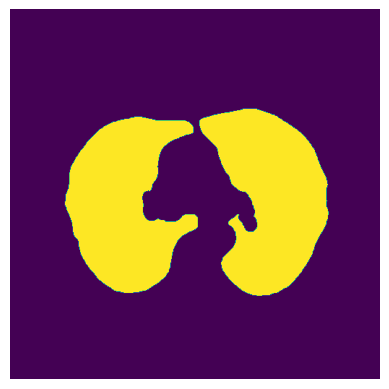

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Charger l'image depuis le chemin spécifié
img = mpimg.imread(test)

# Afficher l'image
plt.imshow(img)
plt.axis('off')  # Masquer les axes
plt.show()


In [ ]:
autotune = tf.data.experimental.AUTOTUNE
image_size = 448
batch_size = 16

## Affichage d'un fichier nii

In [1]:
pip install nibabel


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


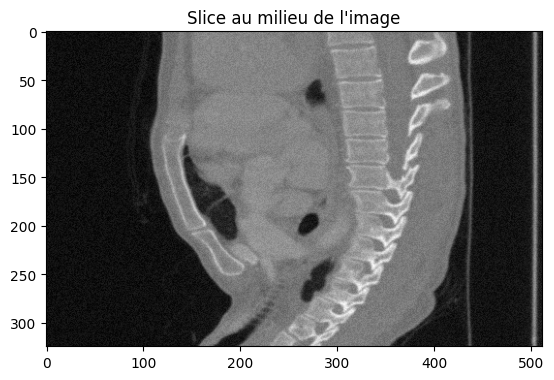

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt

# Charger le fichier NIfTI
nifti_file_path = "./archive/3d_images/IMG_0002.nii"
img = nib.load(nifti_file_path)

# Accéder aux données de l'image (tableau NumPy)
data = img.get_fdata()

# Afficher une coupe transversale (slice) de l'image
plt.imshow(data[:, :, data.shape[2] // 2], cmap='gray')
plt.title('Slice au milieu de l\'image')
plt.show()


In [7]:
exclude = [images_path+'/ID_0254_Z_0075.tif',mask_path+'/ID_0254_Z_0075.tif',
           images_path+'/ID_0052_Z_0108.tif',mask_path+'/ID_0052_Z_0108.tif',
           images_path+'/ID_0079_Z_0072.tif',mask_path+'/ID_0079_Z_0072.tif',
           images_path+'/ID_0134_Z_0137.tif',mask_path+'/ID_0134_Z_0137.tif']
print(len(os.listdir(images_path)))
count = len(os.listdir(images_path))-len(exclude)/2
print(count)

267
263.0


In [ ]:
#Function READ Images
def read_mask(image):
    path = image.numpy().decode('utf-8')
    if path not in exclude:
        image = cv2.imread(path,0) #Donnée le path a la methode et le 0 pour lire la premier image.
        image = image*257. #Le 257 pour multiplier images par 257 pixels.pour augmenter le contraste, augmenter la luminosité ...
        image = np.expand_dims(image,2)# Ajouter une dimension a une image(tableau array)
        image = tf.image.resize(image, [image_size,image_size])#Redimentionnée une image.
    else:
        image = np.zeros((image_size,image_size,1),dtype = np.float32)
    return image

# La meme chose pour le mask.
def read_mask(image):
    path = image.numpy().decode('utf-8')
    if path not in exclude:
        image = cv2.imread(path,0)
        image = image*257.
        image = np.expand_dims(image,2)
        image = tf.image.resize(image, [image_size,image_size])
    else:
        image = np.zeros((image_size,image_size,1),dtype=np.float32)
    return image

In [ ]:
'''faire une augmentation de donnée, et ca on utilisant tensorflow, 
on faite une augmentation pour l'images et aussi pour les labels
pour maintenir la cohérence entre les images et les labels.'''
def augmentation(image,label):
    seed = np.random.randint(0,64)
    image = tf.image.random_flip_left_right(image, seed=seed)
    image = tf.image.random_flip_up_down(image, seed=seed)
    image = tf.image.random_contrast(image, 0.3, 0.7, seed=seed)
    label = tf.image.random_flip_left_right(label, seed=seed)
    label = tf.image.random_flip_up_down(label, seed=seed)
    label = tf.image.random_contrast(label, 0.3, 0.7, seed=seed)
    return image,label